In [38]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import glob
import math 
import seaborn as sns
colors=sns.color_palette('colorblind')


#For exclusive channels, only need this function
def getContour(x,y,z,val,k, file=None):
    N=2500

    levels = [val]
    fig, ax = plt.subplots()

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    cs = plt.contour(xi,yi,zi,levels)
    p = cs.collections[0].get_paths()
    plt.close(fig)  # Close the figure to avoid displaying it
    v = p[k].vertices
    
    return v

#For inclusive channels, need to profile over one of the parameters
# Vals is just taken from a text file where the corresponding columns mentioned in the function represent
#the chisq values, m4 values, ue4 values, and um4 values
#Returns profiled list of um4, m4, and chisq, in this case profiling over ue4
def make_list_over(vals):
    m4s  = np.unique(vals[:,3])   #m4
    ue4s = np.unique(vals[:,4])   #ue4
    um4s = np.unique(vals[:,5])   #um4

    # need to build list of um4 m4 chi2
    my_list = []
    for um4 in um4s:
        mask1 = vals[:,5]==um4
        for m4 in m4s:
            mask2 = vals[:,3]==m4
            mask = np.logical_and(mask1, mask2)
            #chisqs = vals[:,2][mask][0]
            chisqs = vals[:,2][mask][0]
            #chisq_min = chisqs[np.where(vals[:,4][mask]==np.min(vals[:,4][mask]))]
            chisq_min = np.min(vals[:,2][mask]) #[0]
            #print([um4, m4, chisq_min])
            my_list.append([um4, m4, chisq_min])
            #my_list.append([um4, m4, chisqs])
    return np.asarray(my_list)

/var/folders/zn/bxj5zskd2bbcy_741tt57c8c0000gn/T/ipykernel_44392/3313354747.py:26: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  p = cs.collections[0].get_paths()


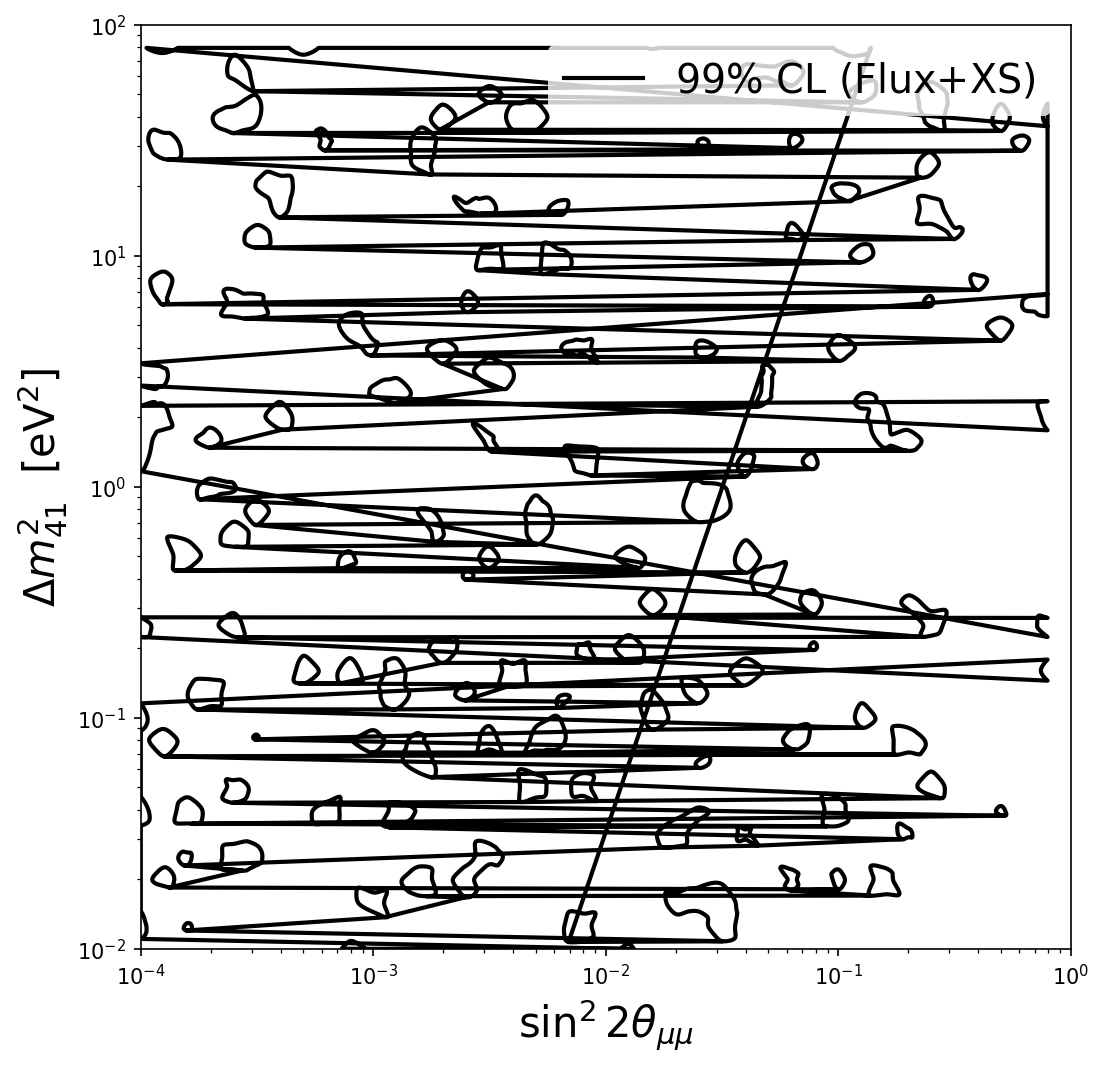

In [47]:

#Load text file containing m4, um4, ue4, and chisq values
nueapp_vals = np.genfromtxt('/Users/pinguino/Desktop/code/PROfit/sbn_analysis_workshop_2024/Elephant_Vanishes/build/bin/testing.txt')

############### sensitivity curve for nue appearance ############################
## Pass the function 1) ue4(or um4) 2) m4 3) chisq and 4) critical chisq value. here it's 6.63 i.e 99%CL 
nue_99CL = getContour((nueapp_vals[:,0]),nueapp_vals[:,1],nueapp_vals[:,2], 3.67e-9, 0) 


f=plt.figure(figsize=(8,8), dpi=150)
ax=plt.subplot(111)
plt.loglog()
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)

plt.plot(10**(nue_99CL[:,0]) ,10**(nue_99CL[:,1]) ,linewidth=2, linestyle="-",label="$99\\%$ CL (Flux+XS)", color='k')

#plt.text(0.5e-2, 5, 'SBND(5.8e20) ICARUS(9.2e20)', fontsize=15)
#ax.tick_params('both',length=7, width=1, which='minor' )
#ax.tick_params('both',length=13, width=1.7, which='major' )

proxy = [mlines.Line2D([], [], color=pc,linewidth=3) 
    for pc in ['k']]

leg=plt.legend(fontsize=19, loc='upper right')
leg.get_frame().set_linewidth(0.0)
plt.ylim(1e-2, 100)
plt.xlim(1e-4, 1)
plt.show()